In [1]:
# Pymaceuticals Inc.

In [2]:
# Analysis

In [3]:
# Import
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# mouse_metadata.head()
# study_results.head()
combined_mouse_data_df = pd.merge(mouse_metadata,study_results,how="inner",on=['Mouse ID'])
combined_mouse_data_df

# Display the data table for preview
combined_mouse_data_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [4]:
# Count number of mice
mice = combined_mouse_data_df['Mouse ID'].unique()
mice_df = pd.DataFrame({'Mouse ID': mice})
mouse_count = mice_df['Mouse ID'].count()
mouse_count

249

In [5]:
combined_mouse_data_df[['Mouse ID','Timepoint']].value_counts()

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Name: count, Length: 1888, dtype: int64

In [6]:
# Get all the data for the duplicate mouse ID.
combined_mouse_data_df.set_index('Mouse ID').loc['g989']

Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                           
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          0   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26          5   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         10   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         15   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         20   
g989         Propriva  Female          21          26         25   
g989         Propriva  Female          21          26         30   
g989         Propriva  Female          21          26         35   

          Tumor Volume (mm3)  Metastatic Sites  
Mouse ID                                        
g989               45.000000                 0  
g989               45.000000                 0  
g989               48.786801                 0  
g989               47.570392                 0  
g989               51.745156                 0  
g989               49.880528                 0  
g989               51.325852                 1  
g989               53.442020                 0  
g989               55.326122                 1  
g989               54.657650                 1  
g989               56.045564                 1  
g989               59.082294                 1  
g989               62.570880                 2

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_df = combined_mouse_data_df.set_index('Mouse ID').drop('g989')
clean_mouse_data_df
fixed_clean_mouse_data_df= clean_mouse_data_df.reset_index()
fixed_clean_mouse_data_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1875     z969     Naftisol  Male           9          30         25   
1876     z969     Naftisol  Male           9          30         30   
1877     z969     Naftisol  Male           9          30         35   
1878     z969     Naftisol  Male           9          30         40   
1879     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1875           63.145652                 2  
1876           65.841013                 3  
1877           69.176246                 4  
1878           70.314904                 4  
1879           73.867845                 4  

[1880 rows x 8 columns]

In [8]:
# Count number of mice again
new_mice = fixed_clean_mouse_data_df['Mouse ID'].unique()
new_mice_df = pd.DataFrame({'Mouse ID': new_mice})
new_mouse_count = new_mice_df['Mouse ID'].count()
new_mouse_count

248

In [9]:
# Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean
tumor_volume_mean_df = fixed_clean_mouse_data_df[['Tumor Volume (mm3)','Drug Regimen']].groupby(['Drug Regimen']).mean()
tumor_volume_mean_df = tumor_volume_mean_df.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume'})
#tumor_volume_mean_df

# median
tumor_volume_median_df = fixed_clean_mouse_data_df[['Tumor Volume (mm3)','Drug Regimen']].groupby(['Drug Regimen']).median()
tumor_volume_median_df = tumor_volume_median_df.rename(columns={'Tumor Volume (mm3)': 'Median Tumor Volume'})
#tumor_volume_median_df

# variance
tumor_volume_variance_df = fixed_clean_mouse_data_df[['Tumor Volume (mm3)','Drug Regimen']].groupby(['Drug Regimen']).var()
tumor_volume_variance_df = tumor_volume_variance_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Variance'})
#tumor_volume_variance_df

# std deviation
tumor_volume_std_df = fixed_clean_mouse_data_df[['Tumor Volume (mm3)','Drug Regimen']].groupby(['Drug Regimen']).std()
tumor_volume_std_df = tumor_volume_std_df.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Std. Dev.'})
#tumor_volume_std_df

# std error
tumor_volume_stderror_df = fixed_clean_mouse_data_df[['Tumor Volume (mm3)','Drug Regimen']].groupby(['Drug Regimen']).sem()
tumor_volume_stderror_df = tumor_volume_stderror_df.rename(columns={'Tumor Volume (mm3)': 'Tumor volume Std. Err.'})
#tumor_volume_stderror_df


# Assemble the resulting series into a single summary DataFrame.
summary_stat_1 = pd.merge(tumor_volume_mean_df,tumor_volume_median_df, how='inner',on='Drug Regimen')
#summary_stat_1
summary_stat_2 = pd.merge(summary_stat_1, tumor_volume_variance_df, how='inner',on='Drug Regimen')
#summary_stat_2
summary_stat_3 = pd.merge(summary_stat_2, tumor_volume_std_df, how='inner',on='Drug Regimen')
summary_stat_3
summary_stat_4 = pd.merge(summary_stat_3, tumor_volume_stderror_df, how='inner',on='Drug Regimen')
summary_stat_4

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [11]:
## Bar and Pie Charts

In [114]:
# Create a list of total number of rows for each drug regimen.
total_rows = fixed_clean_mouse_data_df[['Mouse ID', 'Drug Regimen']].groupby('Drug Regimen').count()

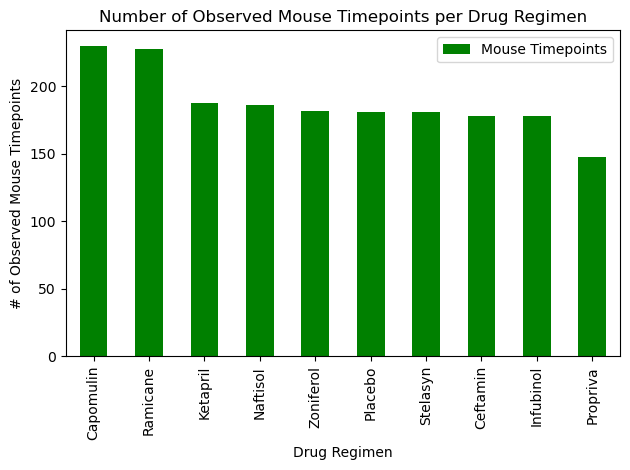

In [13]:
# Generate a bar plot showing the total number of rows for each drug regimen. (Pandas Method)
total_rows = fixed_clean_mouse_data_df[['Mouse ID', 'Drug Regimen']].groupby('Drug Regimen').count()
updated_total_rows.plot(kind="bar", color = 'green')
plt.title("Number of Observed Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.savefig("drug_regimen_pandas.png")

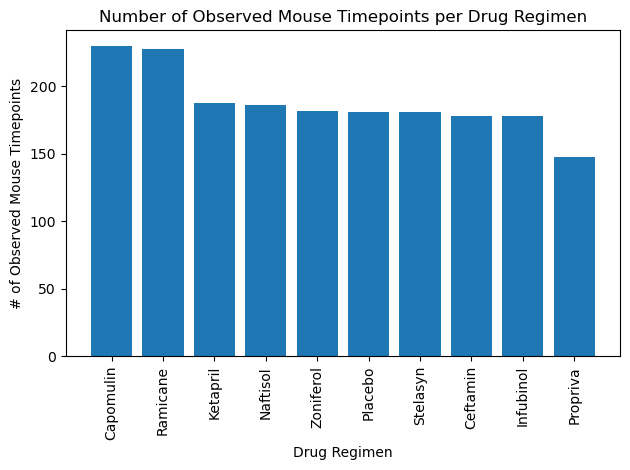

In [14]:
# Generate a bar plot showing the total number of rows for each drug regimen. (Pyplot Method)
total_rows = fixed_clean_mouse_data_df[['Mouse ID', 'Drug Regimen']].groupby('Drug Regimen').count()
updated_total_rows = total_rows.sort_values('Mouse ID', ascending = False)
#updated_total_rows

Drug_Regimen = ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Placebo','Stelasyn','Ceftamin','Infubinol','Propriva']
Mouse_Timepoints = [230,228,188,186,182,181,181,178,178,148]

plt.bar(Drug_Regimen,Mouse_Timepoints)
plt.title("Number of Observed Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("drug_regimen_pyplot.png")

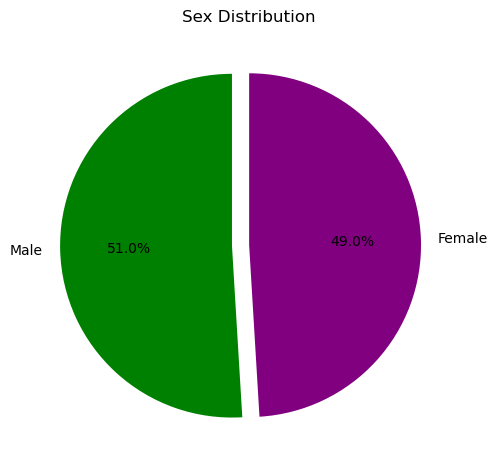

In [15]:
# Generate a pie plot showing the distribution of female versus male mice (Pyplot Methond )
sex_distribution_df = fixed_clean_mouse_data_df[['Mouse ID','Sex']].groupby(['Sex']).count()
sex_distribution_df = sex_distribution_df.rename(columns={'Mouse ID': "Number of Mice"})
sex_distribution_df

Sex = ['Male','Female']
Number_of_Mice = [958,922]

labels = ['Male','Female']
explode = [0.1,0]
colors = ['green', 'purple']

plt.pie(Number_of_Mice, labels = labels, colors = colors, explode = explode, autopct="%1.1f%%", startangle=90)
plt.title("Sex Distribution")
plt.tight_layout()
plt.savefig("Sex_Distribution_Pyplot.png")

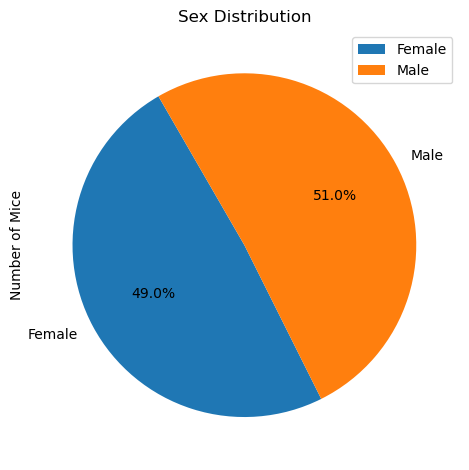

In [16]:
# Generate a pie plot showing the distribution of female versus male mice (Pandas Method)

sex_distribution_df = fixed_clean_mouse_data_df[['Mouse ID','Sex']].groupby(['Sex']).count()
sex_distribution_df = sex_distribution_df.rename(columns={'Mouse ID': "Number of Mice"})
sex_distribution_df.plot(kind="pie",y='Number of Mice', autopct="%1.1f%%", startangle = 120)
plt.title("Sex Distribution")
plt.tight_layout()
plt.savefig("Sex_Distribution_Pandas.png")

In [17]:
## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint_df = fixed_clean_mouse_data_df[['Mouse ID',"Timepoint"]]
mouse_timepoint_df = mouse_timepoint_df.groupby('Mouse ID').max('Timepoint')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint_df = pd.merge(mouse_timepoint_df,fixed_clean_mouse_data_df,how='inner',on=['Timepoint','Mouse ID'])
greatest_timepoint_df

Timepoint Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  \
0           45     a203    Infubinol  Female          20          23   
1           45     a251    Infubinol  Female          21          25   
2           45     a262      Placebo  Female          17          29   
3           45     a275     Ceftamin  Female          20          28   
4           30     a366     Stelasyn  Female          16          29   
..         ...      ...          ...     ...         ...         ...   
243         10     z435     Propriva  Female          12          26   
244         45     z578     Ramicane    Male          11          16   
245         45     z581    Infubinol  Female          24          25   
246         45     z795     Naftisol  Female          13          29   
247         45     z969     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
243           48.710661                 0  
244           30.638696                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

greatest_timepoint_df_new_index = greatest_timepoint_df.set_index('Drug Regimen')

# Capomulin
Capomulin_df = greatest_timepoint_df_new_index.loc['Capomulin']
Capomulin_df

Capomulin_array = np.array(Capomulin_df['Tumor Volume (mm3)'])
Capomulin_array.sort()
Capomulin_array

# Ramicane
Ramicane_df = greatest_timepoint_df_new_index.loc['Ramicane']
Ramicane_df

Ramicane_array = np.array(Ramicane_df['Tumor Volume (mm3)'])
Ramicane_array.sort()
Ramicane_array

# Infubinol
Infubinol_df = greatest_timepoint_df_new_index.loc['Infubinol']
Infubinol_df

Infubinol_array = np.array(Infubinol_df['Tumor Volume (mm3)'])
Infubinol_array.sort()
Infubinol_array

# Ceftamin
Ceftamin_df = greatest_timepoint_df_new_index.loc['Ceftamin']
Ceftamin_df

Ceftamin_array = np.array(Ceftamin_df['Tumor Volume (mm3)'])
Ceftamin_array.sort()
Ceftamin_array

four_drug_treatments_df = pd.DataFrame({'Capomulin': Capomulin_array,'Ramicane':Ramicane_array,'Infubinol': Infubinol_array,'Ceftamin':Ceftamin_array})

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [21]:
# An empty list is created to fill with tumor volume data
tumor_volume_data = []

<Axes: >

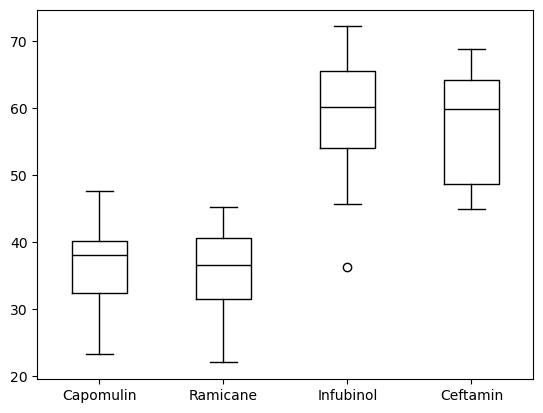

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

four_drug_treatments_df.plot(kind='box', color = 'black')

In [60]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Capomulin
Capomulin_series = pd.Series(Capomulin_array)
Capomulin_series
Capomulin_quartiles = Capomulin_series.quantile([.25,.5,.75])
Capomulin_quartiles
Capomulin_upper = Capomulin_quartiles[0.75]
Capomulin_upper
Capomulin_lower = Capomulin_quartiles[0.25]
Capomulin_lower
Capomulin_iqr = (Capomulin_upper - Capomulin_lower)
Capomulin_iqr
Capomulin_lower_bound = Capomulin_lower - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upper + (1.5*Capomulin_iqr)
print("Capomulin Bounds:")
print(Capomulin_lower_bound,Capomulin_upper_bound)
print(Capomulin_series)
print("No Outliers for Capomulin")

# Ramicane
Ramicane_series = pd.Series(Ramicane_array)
Ramicane_series
Ramicane_quartiles = Ramicane_series.quantile([.25,.5,.75])
Ramicane_quartiles
Ramicane_upper = Ramicane_quartiles[.75]
Ramicane_lower = Ramicane_quartiles[.25]
Ramicane_iqr = Ramicane_upper - Ramicane_lower
Ramicane_iqr
Ramicane_lower_bound = Ramicane_lower - (1.5*Ramicane_iqr)
Ramicane_lower_bound
Ramicane_upper_bound = Ramicane_upper + (1.5*Ramicane_iqr)
Ramicane_upper_bound
print("Ramicane Bounds:")
print(Ramicane_lower_bound,Ramicane_upper_bound)
print(Ramicane_series)
print("No Outliers for Ramicane")

# Infubinol
Infubinol_series = pd.Series(Infubinol_array)
Infubinol_series
Infubinol_quartiles = Infubinol_series.quantile([.25,.5,.75])
Infubinol_quartiles
Infubinol_upper = Infubinol_quartiles[.75]
Infubinol_lower = Infubinol_quartiles[.25]
Infubinol_iqr = Infubinol_upper - Infubinol_lower
Infubinol_iqr
Infubinol_lower_bound = Infubinol_lower - (1.5*Infubinol_iqr)
Infubinol_lower_bound
Infubinol_upper_bound = Infubinol_upper + (1.5*Infubinol_iqr)
Infubinol_upper_bound
print("Infubinol Bounds:")
print(Infubinol_lower_bound,Infubinol_upper_bound)
print(Infubinol_series)
print("1 Outlier for Infubinol: 36.321346")


# Ceftamin
Ceftamin_series = pd.Series(Ceftamin_array)
Ceftamin_series
Ceftamin_quartiles = Ceftamin_series.quantile([.25,.5,.75])
Ceftamin_quartiles
Ceftamin_upper = Ceftamin_quartiles[.75]
Ceftamin_lower = Ceftamin_quartiles[.25]
Ceftamin_iqr = Ceftamin_upper - Ceftamin_lower
Ceftamin_iqr
Ceftamin_lower_bound = Ceftamin_lower - (1.5*Ceftamin_iqr)
Ceftamin_lower_bound
Ceftamin_upper_bound = Ceftamin_upper + (1.5*Ceftamin_iqr)
Ceftamin_upper_bound
print("Ceftamin Bounds:")
print(Ceftamin_lower_bound,Ceftamin_upper_bound)
print(Ceftamin_series)
print("0 Outliers for Ceftamin")

Capomulin Bounds:
20.70456164999999 51.83201549
0     23.343598
1     28.430964
2     28.484033
3     30.485985
4     31.023923
5     31.896238
6     32.377357
7     33.329098
8     34.455298
9     36.041047
10    37.074024
11    37.311846
12    38.125164
13    38.753265
14    38.846876
15    38.939633
16    38.982878
17    39.952347
18    40.159220
19    40.658124
20    40.728578
21    41.483008
22    41.581521
23    46.539206
24    47.685963
dtype: float64
No Outliers for Capomulin
Ramicane Bounds:
17.912664470000003 54.30681135
0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    36.561652
13    37.225650
14    37.311236
15    38.342008
16    38.407618
17    38.810366
18    40.659006
19    40.667713
20    43.047543
21    43.166373
22    43.419381
23    44.183451
24    45.220869
dtype: float64
No Outliers for Ramicane
Infubinol Bounds:
36.83

In [ ]:
## Line and Scatter Plots

[]

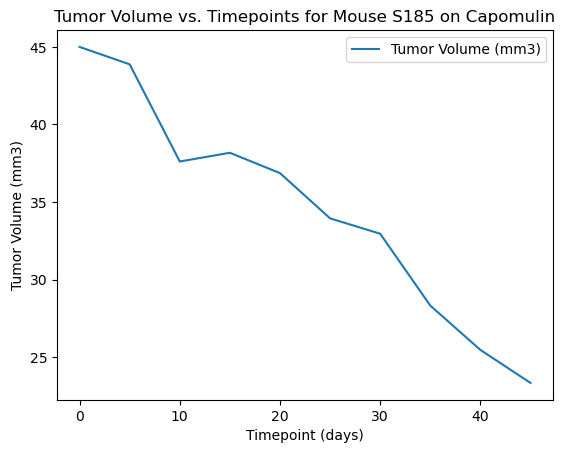

In [95]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
drug_regimen_df = fixed_clean_mouse_data_df.set_index(['Drug Regimen'])
drug_regimen_df = drug_regimen_df.loc['Capomulin']
drug_regimen_df = drug_regimen_df[['Mouse ID','Timepoint','Tumor Volume (mm3)']]
drug_regimen_df = drug_regimen_df.set_index('Mouse ID')
drug_regimen_df = drug_regimen_df.loc['s185']
drug_regimen_df = drug_regimen_df.set_index('Timepoint')
drug_regimen_df

drug_regimen_df.plot(kind='line')
plt.title('Tumor Volume vs. Timepoints for Mouse S185 on Capomulin')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot()

In [148]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Tumor Volume (mm3)  Weight (g)
Drug Regimen                                
Capomulin              40.675741   19.965217

In [ ]:
## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen